### Predicting Advertising Revenue using Linear Regression

In this notebook, we develop a **multiple linear regression model** to estimate product sales based on advertising spend across three channels: **TV**, **Radio**, and **Newspaper**.

The goal is to understand:

- How much each advertising channel contributes to sales.
- How to use a simple yet powerful regression model to make predictions.
- How to interpret the model coefficients to extract business insights.

We'll start with a **simple model using only TV advertising** to illustrate the basic concept of linear regression. Then, we'll move on to **multiple regression** with all three features to see how they interact and contribute to the overall prediction.

This notebook is ideal for beginners and focuses on explaining:

- The intuition behind linear regression
- How to evaluate model performance
- How to visualize and interpret the results

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration

In [5]:
df = pd.read_csv(f"Advertising.csv")

In [7]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


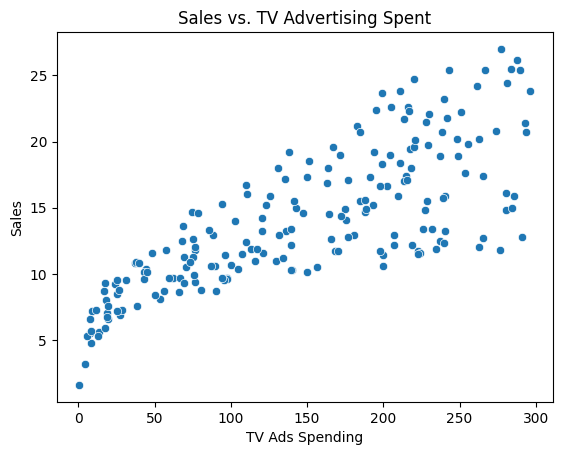

In [15]:
sns.scatterplot(x='TV', y='sales', data=df)
plt.title('Sales vs. TV Advertising Spent')
plt.xlabel('TV Ads Spending')
plt.ylabel('Sales')
plt.show()

<Axes: >

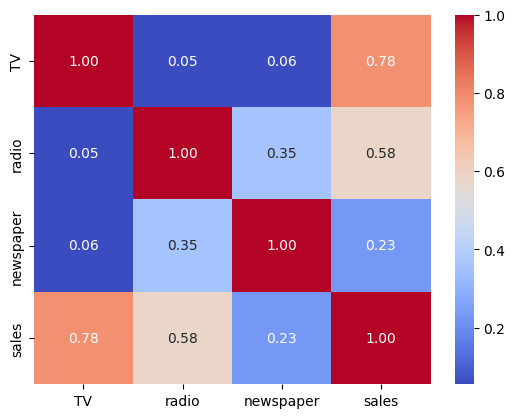

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [28]:
df['sales'].describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: sales, dtype: float64

### Model - Simple Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [42]:
X = df[['TV']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"R^2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficients: {model.coef_}")

R^2 Score: 0.6766954295627076
Mean Squared Error: 10.204654118800956
Coefficients: [0.04652973]


### Model - Multiple Linear Regression

In [40]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"R^2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficients: {model.coef_}")

R^2 Score: 0.899438024100912
Mean Squared Error: 3.1740973539761033
Coefficients: [0.04472952 0.18919505 0.00276111]


### Saving model

In [30]:
import pickle

In [31]:
with open('advertising_model.pkl', 'wb') as file:
    pickle.dump(model, file)